In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as mae


import warnings
warnings.filterwarnings('ignore')

c:\Users\thj05\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the dataset and perform initial exploration to understand its structure and characteristics.

In [2]:
df = pd.read_csv('E:/data mining/project/dataset/calories.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
df.shape

(15000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
# Check for missing values in each column
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [7]:
# User_ID is a unique identifier and does not contribute to the regression task
df=df.drop(columns='User_ID')
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Data visualisation


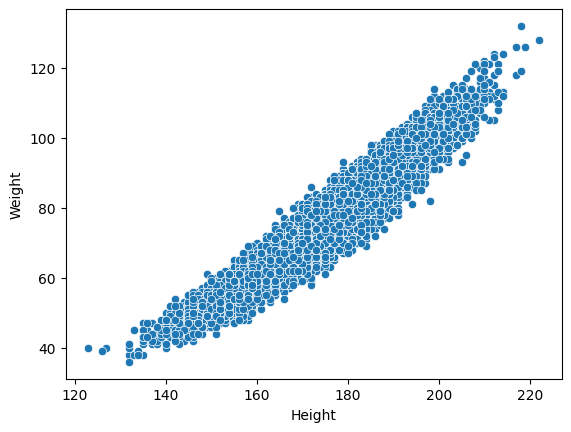

In [8]:
#Scatterplot of height and weight
sns.scatterplot(x='Height', y='Weight', data=df)
plt.savefig('Height and Weight scatter_plots.png')
plt.show()

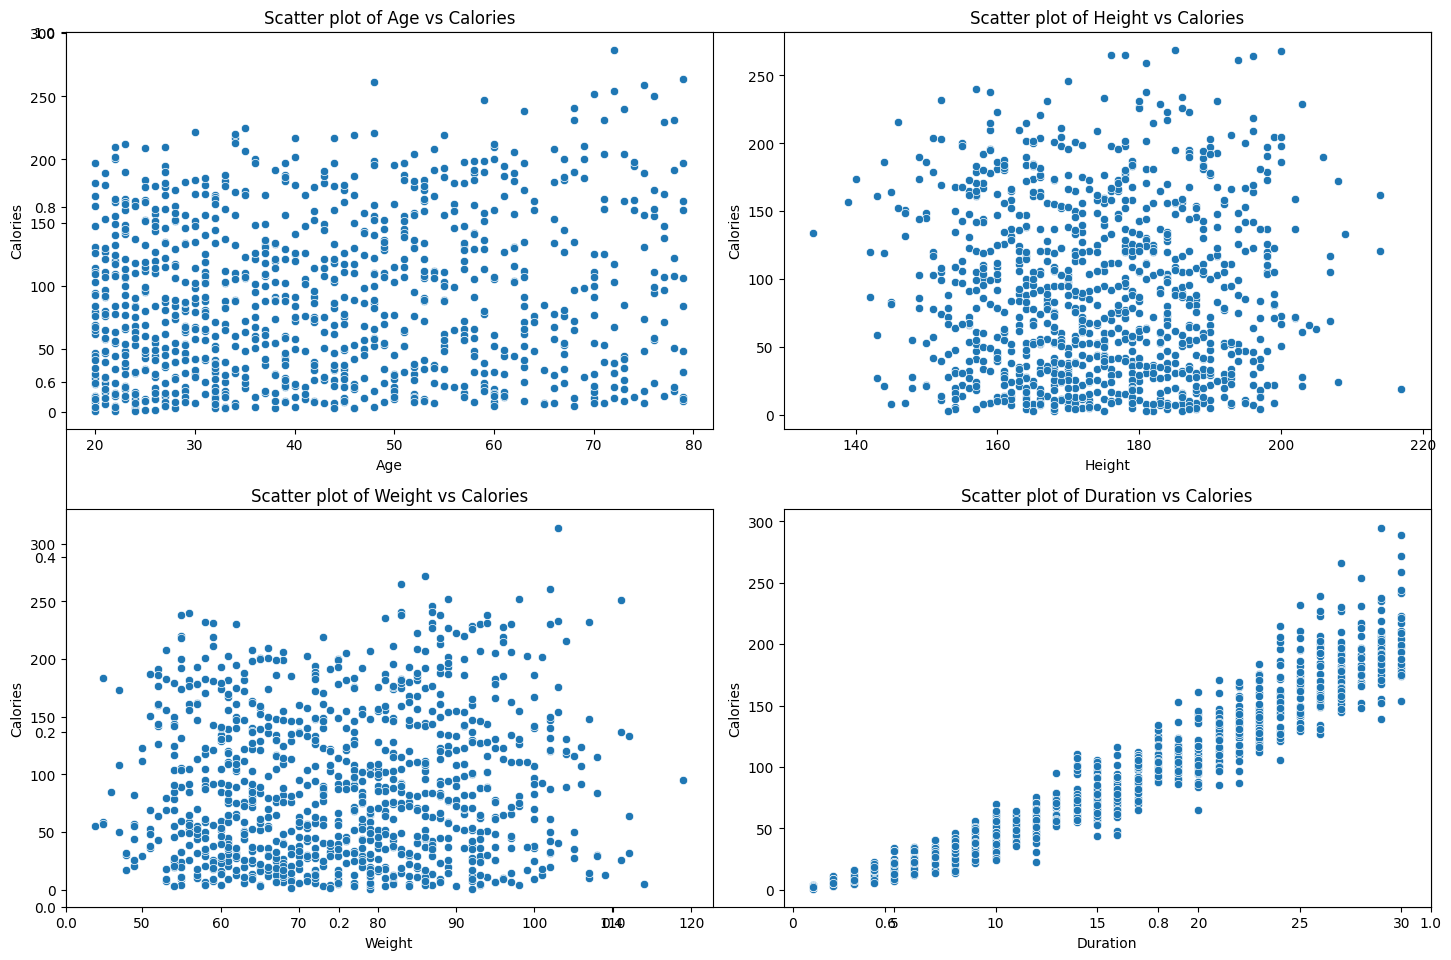

In [9]:
# Select 'Age', 'Height', 'Weight', 'Duration' as features to study the scatterplot distribution of Calories
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sns.scatterplot(x=col, y='Calories', data=x)
    plt.title(f'Scatter plot of {col} vs Calories')
    plt.xlabel(col)
plt.savefig('scatter_plots with Calories.png')
plt.tight_layout()
plt.show()

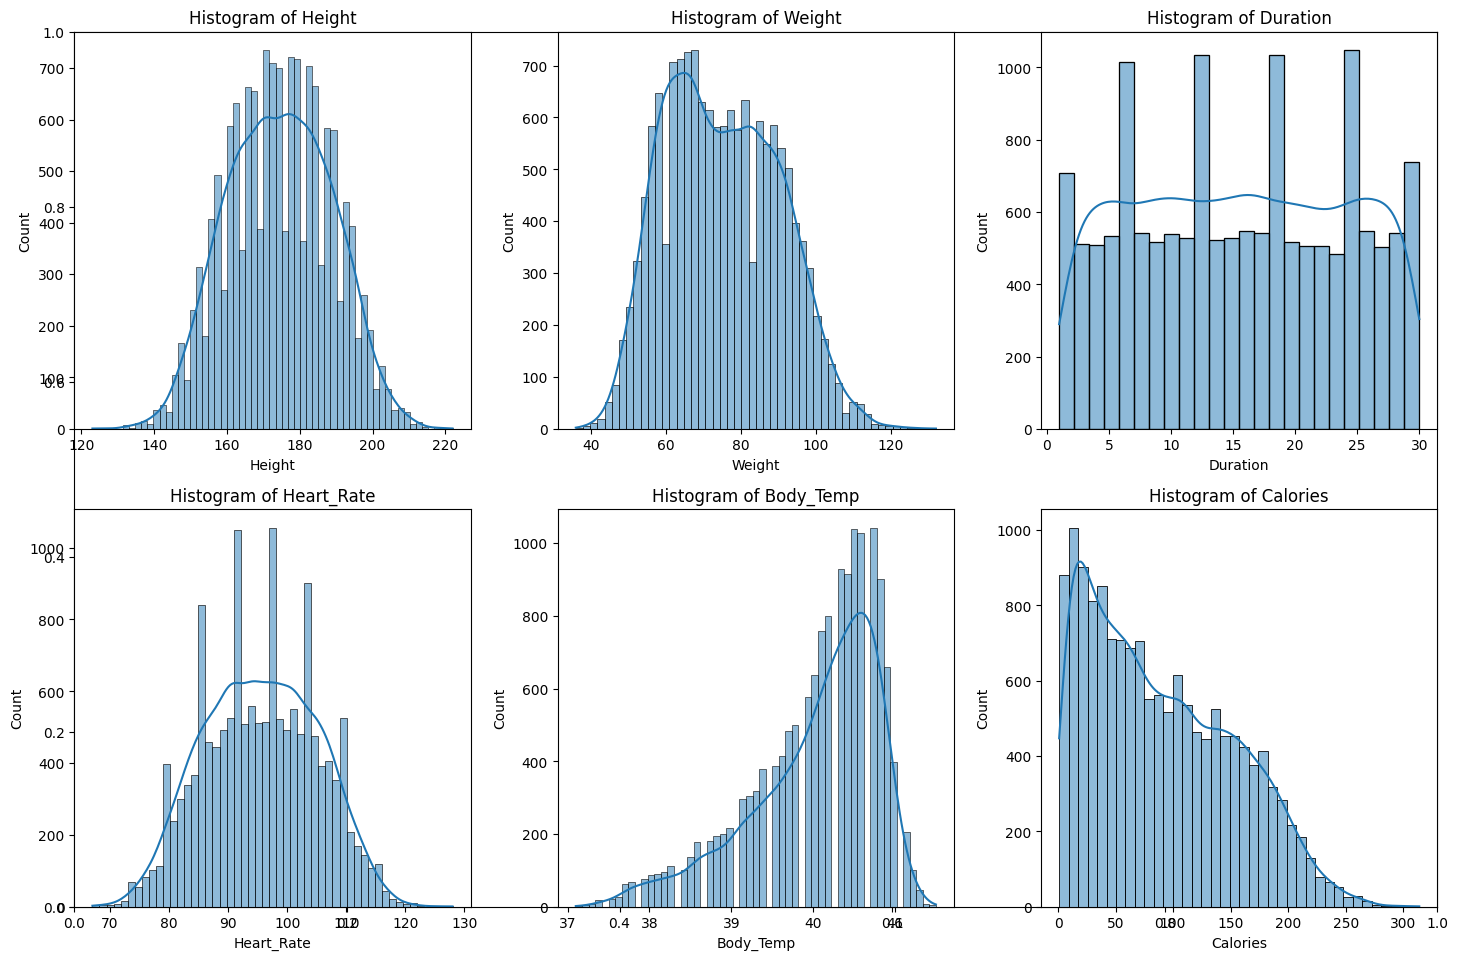

In [10]:
# Plotting histograms containing kernel density estimation (KDE) curves
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col],kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
plt.savefig('hist.png')
plt.tight_layout()
plt.show()

In [11]:
df['Gender']=df['Gender'].map({'male':0,'female':1})
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


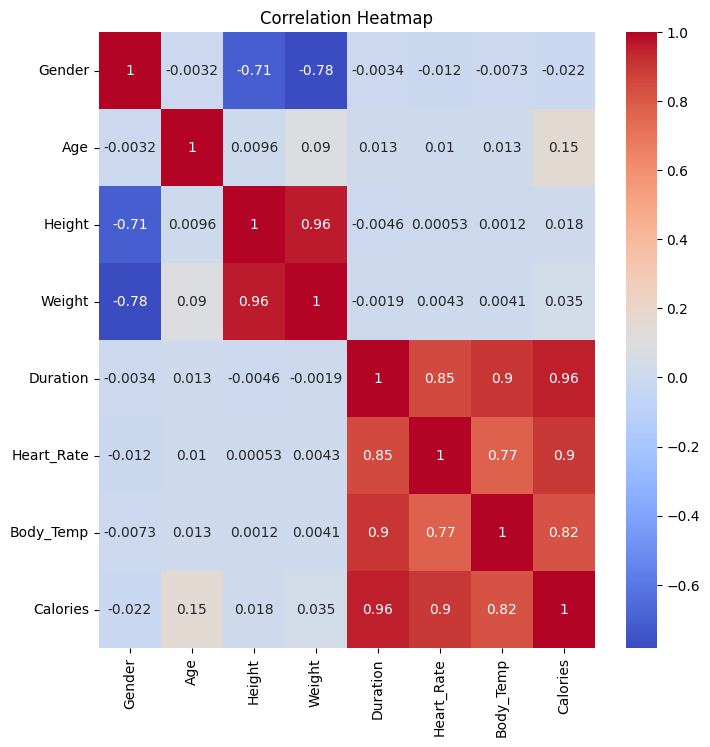

In [12]:
# correlation matrix heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig('Correlation Heatmap.png')
plt.show()

In [13]:
# Divide the dataset
X = df.drop(['Calories'], axis=1)
y = df['Calories']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, X_scaled.shape, y.shape

((12000, 7), (3000, 7), (15000, 7), (15000,))

## Model building Hyperparameter tuning Cross-validation

In [14]:
# Target model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Neural Network': MLPRegressor(max_iter=2000, random_state=42)
}

# Hyperparameter grids
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1, 0.3]},
    'Neural Network': {'hidden_layer_sizes': [(64, 32), (128, 64), (100,)], 'learning_rate_init': [0.001, 0.01]}
}

# Dictionary to store trained models for plotting
fitted_models = {}
results = {}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"{name} Best Parameters: {best_params}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)
    # Store the fitted model
    fitted_models[name] = best_model
    
    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation scores
    cv_mse = -cross_val_score(best_model, X_train, X_train, cv=5, scoring='neg_mean_squared_error').mean()
    cv_r2 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2').mean()
    
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R²': r2, 'CV MSE': cv_mse, 'CV R²': cv_r2}

results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

Ridge Regression Best Parameters: {'alpha': 0.1}
Lasso Best Parameters: {'alpha': 0.1}
Random Forest Best Parameters: {'max_depth': None, 'n_estimators': 200}
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Neural Network Best Parameters: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001}

Model Performance Comparison:
                          MSE       RMSE        R²        CV MSE     CV R²
Linear Regression  131.995746  11.488940  0.967294  9.783233e-29  0.967028
Ridge Regression   131.996351  11.488966  0.967294  8.410862e-10  0.967028
Lasso              133.082123  11.536123  0.967025  1.004645e-02  0.966857
Random Forest        6.981431   2.642240  0.998270  1.766281e-02  0.997580
XGBoost              2.767508   1.663583  0.999314  1.424542e-05  0.999100
Neural Network       0.216959   0.465788  0.999946  1.057302e-03  0.999941


# Comparisons between different models and visualisation of feature significance

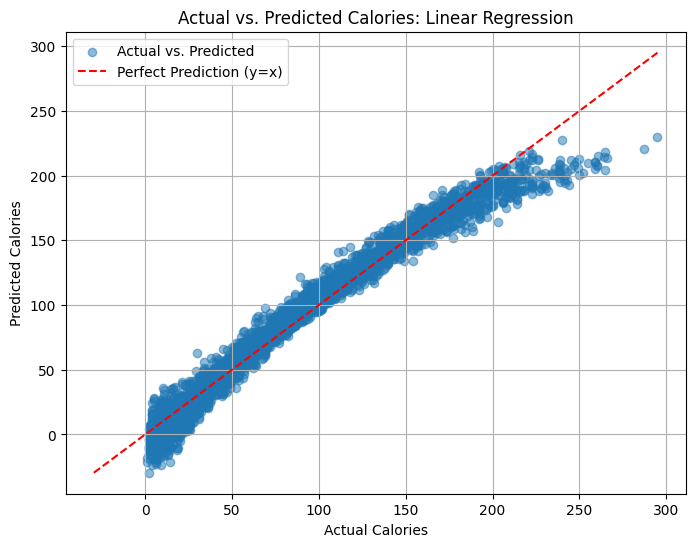

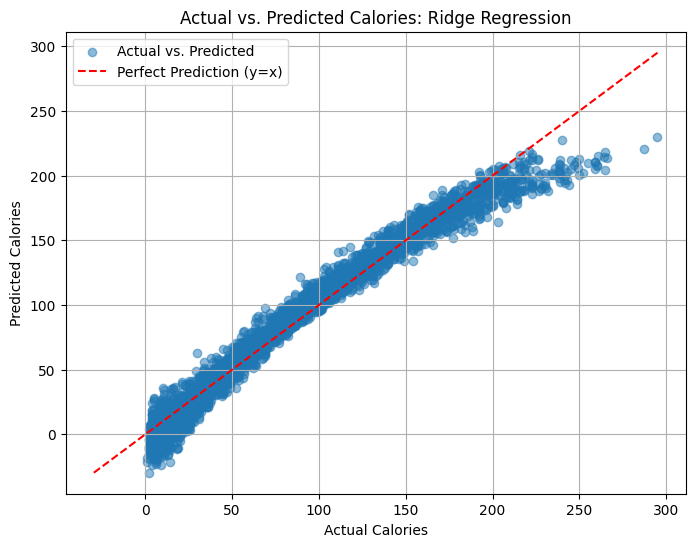

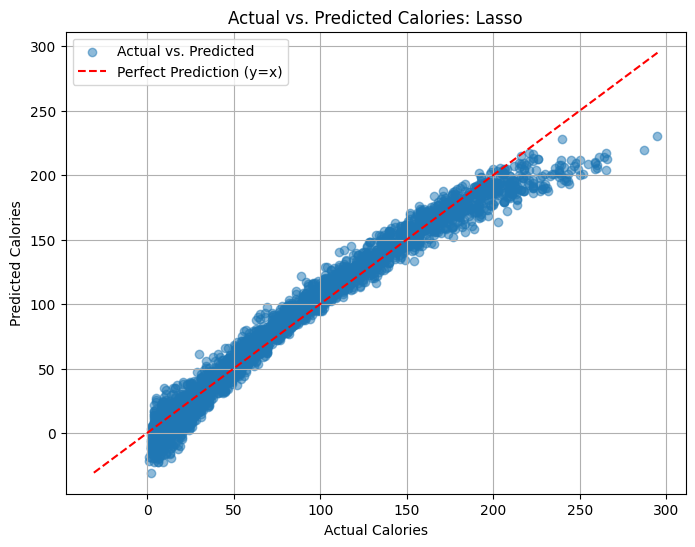

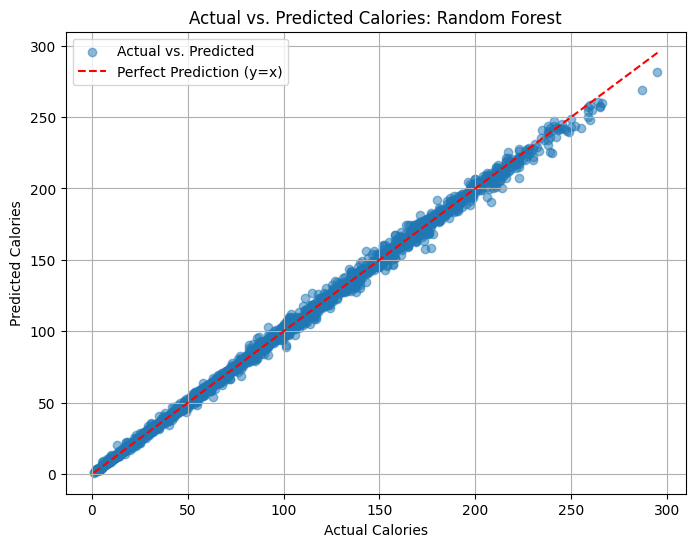

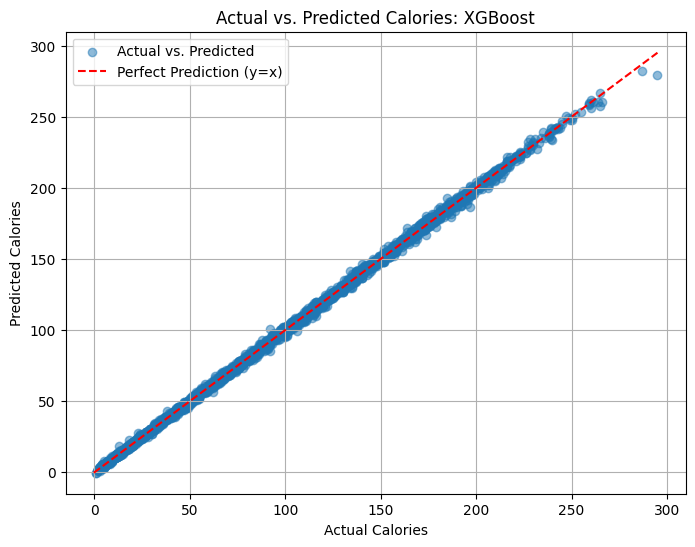

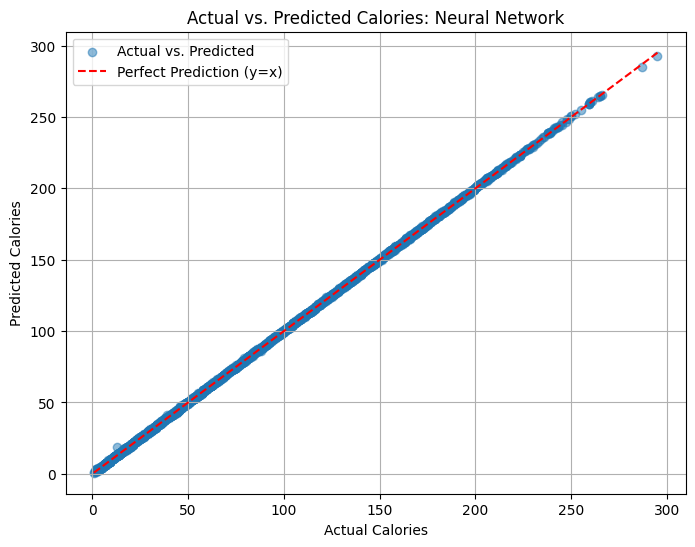

In [19]:
# Plot actual vs. predicted values for each model
for name, model in fitted_models.items():
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted')
    
    # Add diagonal line (perfect prediction line: y=x)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction (y=x)')
    
    plt.xlabel('Actual Calories')
    plt.ylabel('Predicted Calories')
    plt.title(f'Actual vs. Predicted Calories: {name}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'factual_vs_predicted_{name.lower().replace(" ", "_")}.png')
    plt.show()

Neural networks and random forests significantly outperform other models, linear class models work less well

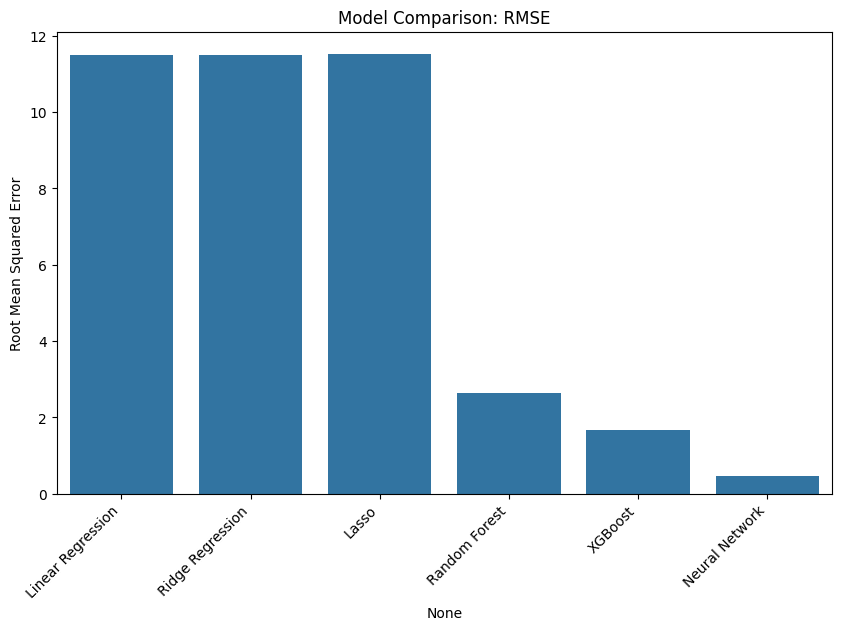

In [20]:
# Visualize RMSE
results_df.index = results_df.index.astype(str)

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['RMSE'])
plt.title('Model Comparison: RMSE')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Root Mean Squared Error')
plt.savefig('Model_Comparison_RMSE.png', bbox_inches='tight')
plt.show()

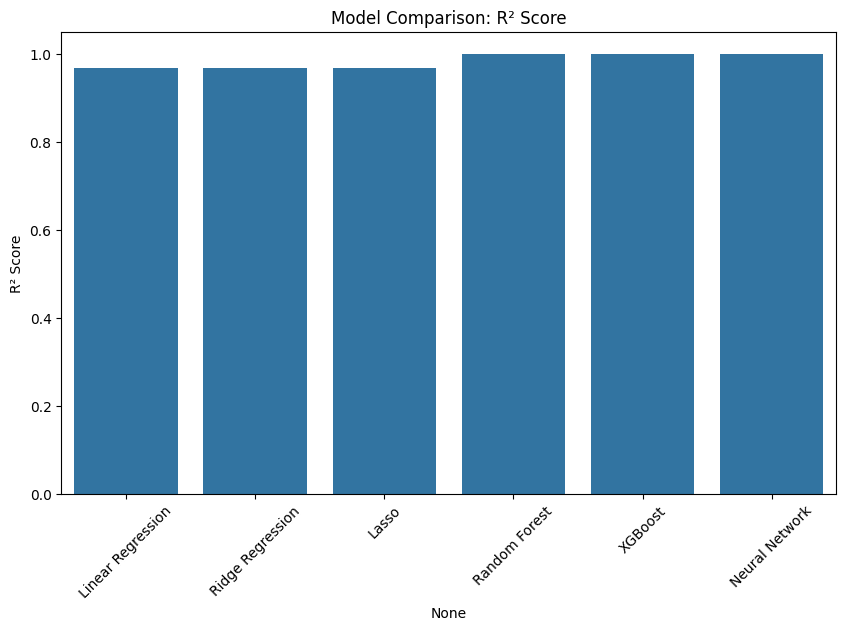

In [21]:
# Visualize R²
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R²'])
plt.title('Model Comparison: R² Score')
plt.xticks(rotation=45)
plt.ylabel('R² Score')
plt.savefig('Model_Comparison_R² Score.png')   
plt.show()

Neural networks, Random forests, XGBoost, all have higher R^2

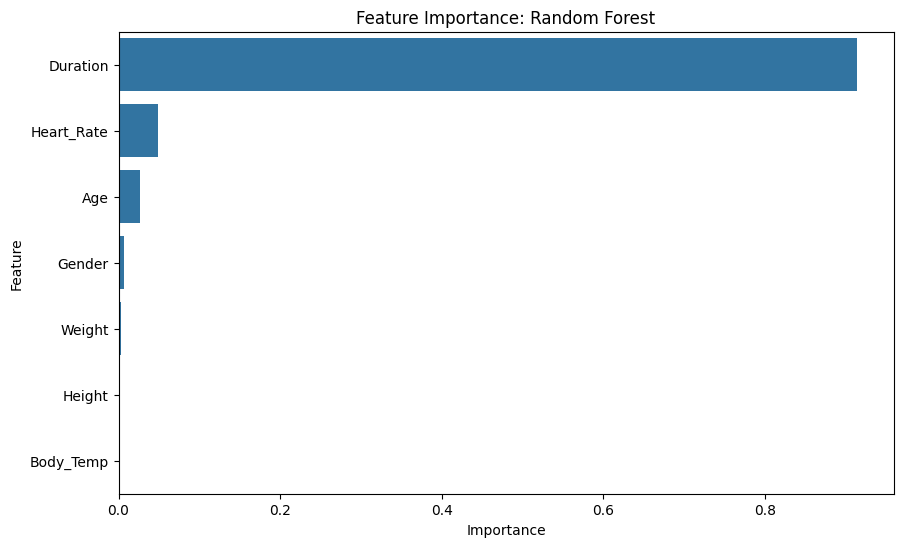

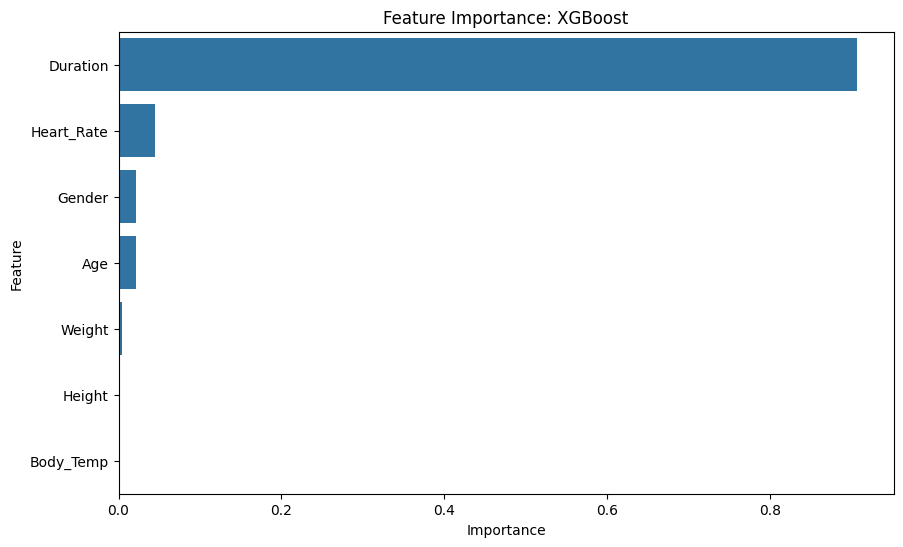

In [22]:
# Visualisation of feature importance
for name in ['Random Forest', 'XGBoost']:
    model = models[name]
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance: {name}')
    plt.savefig(f'Feature_Importance_{name}.png')  
    plt.show()

Duration and Heart_Rate contribute the most to the prediction.